In [13]:
import os

from utils.load_results import *
from utils.plot_helpers import *
from utils.analysis_from_interaction import error_analysis

import pandas as pd # type: ignore
import seaborn as sns # type: ignore
from matplotlib import pyplot as plt # type: ignore
plt.style.use('default')
import random
from seaborn.algorithms import bootstrap # type: ignore

# Quantitative analyses
This notebook contains code to plot and bootstrap confidence intervals for accuracies and other metrics for both agents trained in different context granularities.

In [2]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 300
n_runs = 5
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]
print(paths)

['results/(3,4)_game_size_10_vsf_3', 'results/(3,8)_game_size_10_vsf_3', 'results/(3,16)_game_size_10_vsf_3', 'results/(4,4)_game_size_10_vsf_3', 'results/(4,8)_game_size_10_vsf_3', 'results/(5,4)_game_size_10_vsf_3']


In [3]:
context_unaware = False # whether original or context_unaware simulations are evaluated
setting = 'standard' # context-aware

granularities = True # wether muliple granularities are evaluated
granularity_list = ['coarse', 'mixed', 'fine']

### Accuracies

### Training trajectories

6


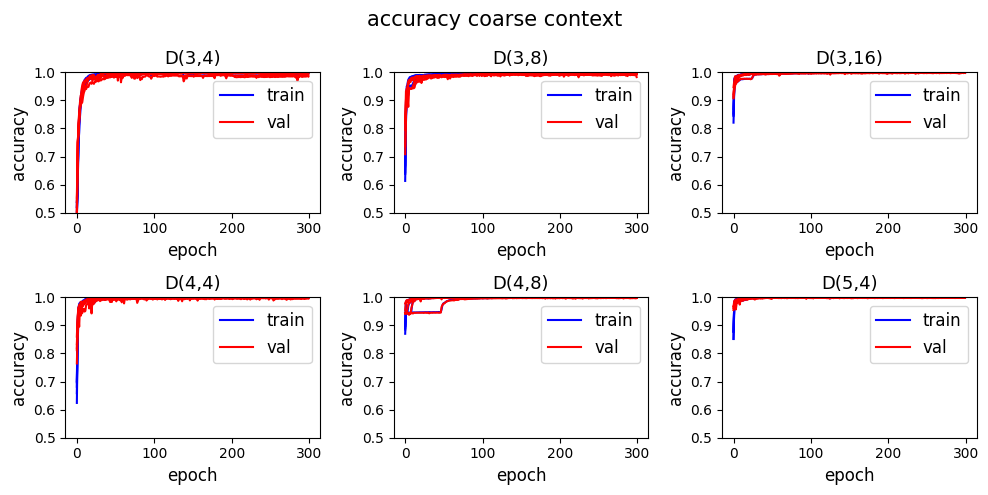

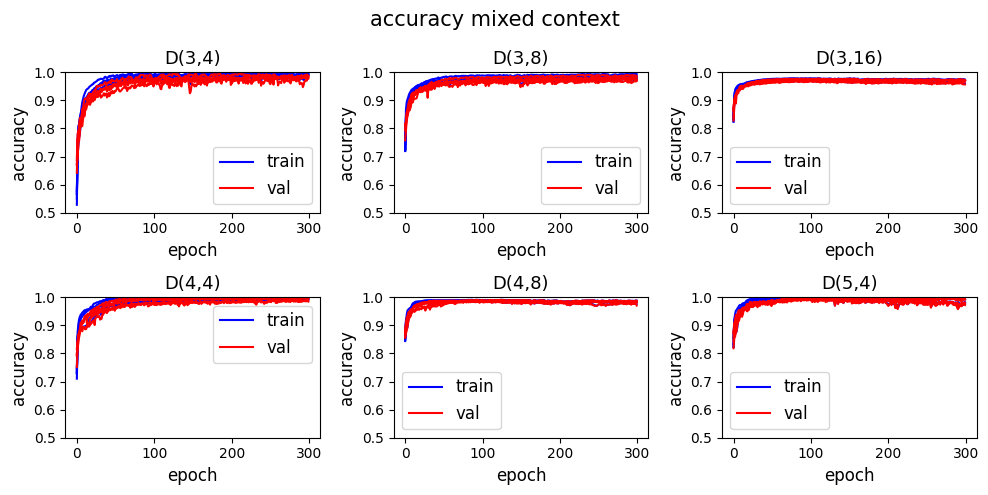

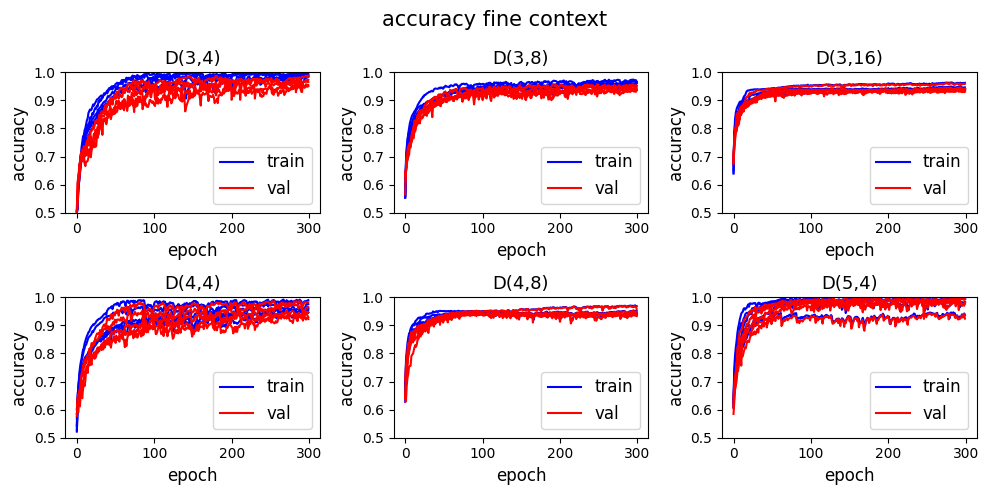

In [4]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, granularities=True, zero_shot=False, context_unaware=context_unaware)
print(len(all_accuracies['fine_train_acc']))

for g in granularity_list:

    plot_training_trajectory(all_accuracies[f'{g}_train_acc'], all_accuracies[f'{g}_val_acc'], 
                               ylim=(0.5, 1), steps=(1, 1), suptitle = 'accuracy '+ g + ' context', figsize = (10, 5))




### Learning speed

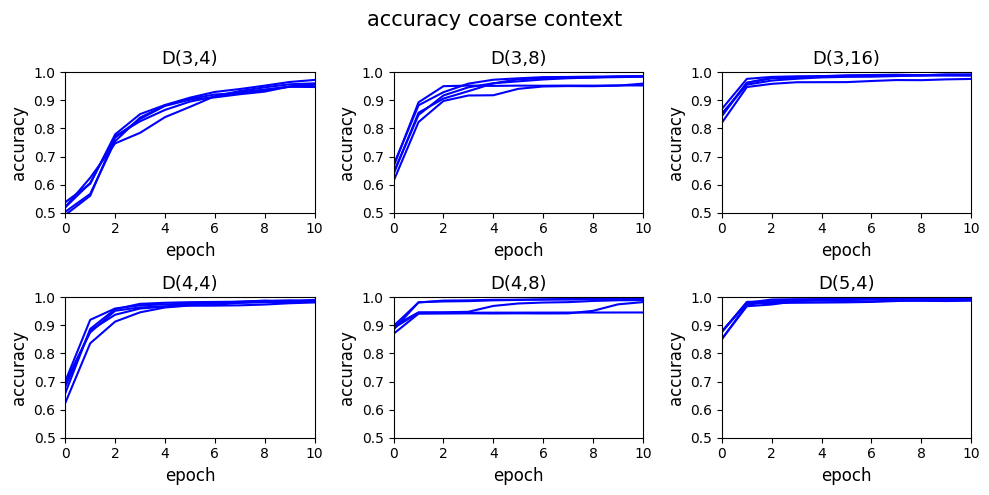

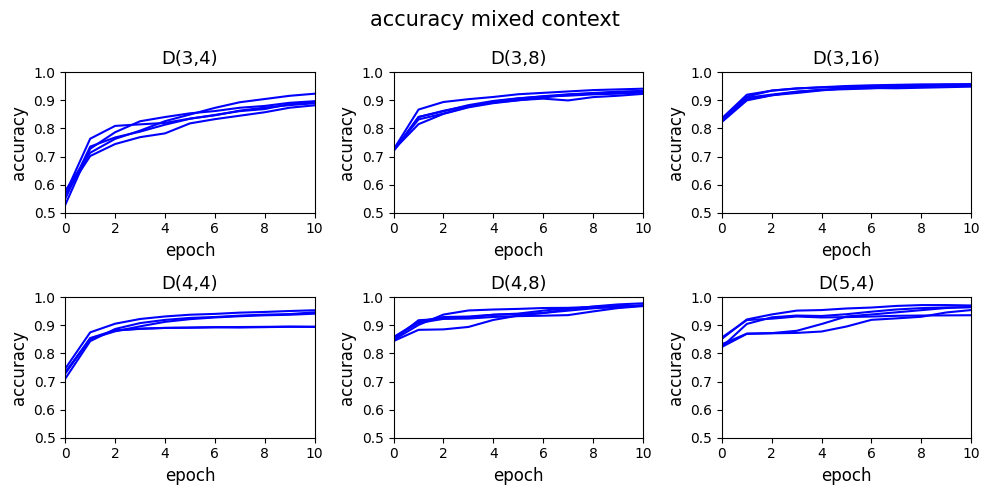

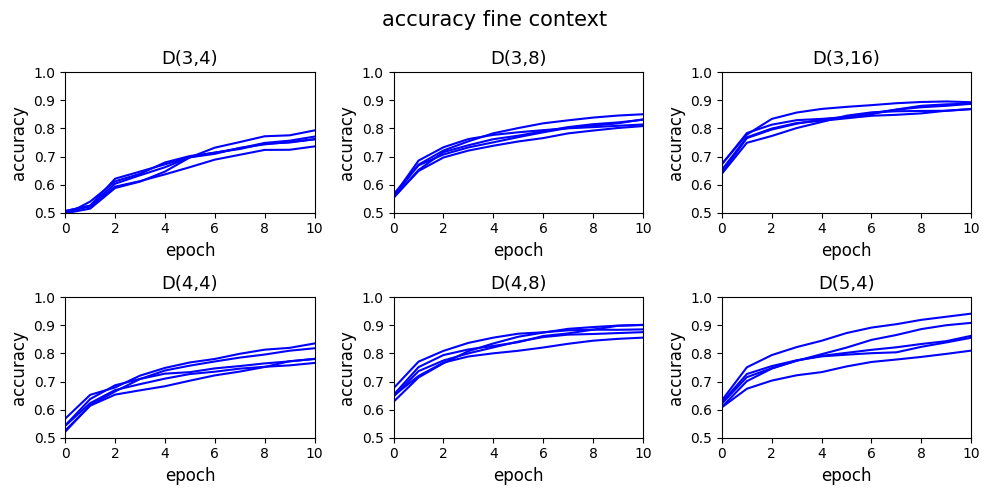

In [5]:

all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, granularities=True, zero_shot=False, context_unaware=context_unaware)

for g in granularity_list:
    #print(g)
    titles = []
    #print(titles)
    for d in datasets:
        titles.append('D'+ d + ' ' + g + ' context')
    #print(titles)
    plot_training_trajectory(all_accuracies[f'{g}_train_acc'], all_accuracies[f'{g}_val_acc'], 
                               ylim=(0.5, 1), xlim=(0, 10), steps=(1, 1), train_only=True, figsize = (10,5), suptitle = 'accuracy '+ g + ' context')


plt.show()


### Final accuracies 
Final accuracies heatmap plot + get accuracy means and sds for table representation.

In [6]:
##### heatmap for train and validation with different granularities:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, granularities = True, val_steps=1, zero_shot=False)
accuracies_grans = []
test_accuracies_grans = []
conds = ['train', 'val']

for g in granularity_list:
    for c in conds:
        accuracies_grans.append(all_accuracies[str(g)+'_' + c + '_acc'])
        #print(all_accuracies[str(g)+'_' + c + '_acc'], '\n\n')


for g in granularity_list:
    test_accuracies_grans.append(all_accuracies[str(g)+'_test_acc'])

#print('granularities',granularity_list)

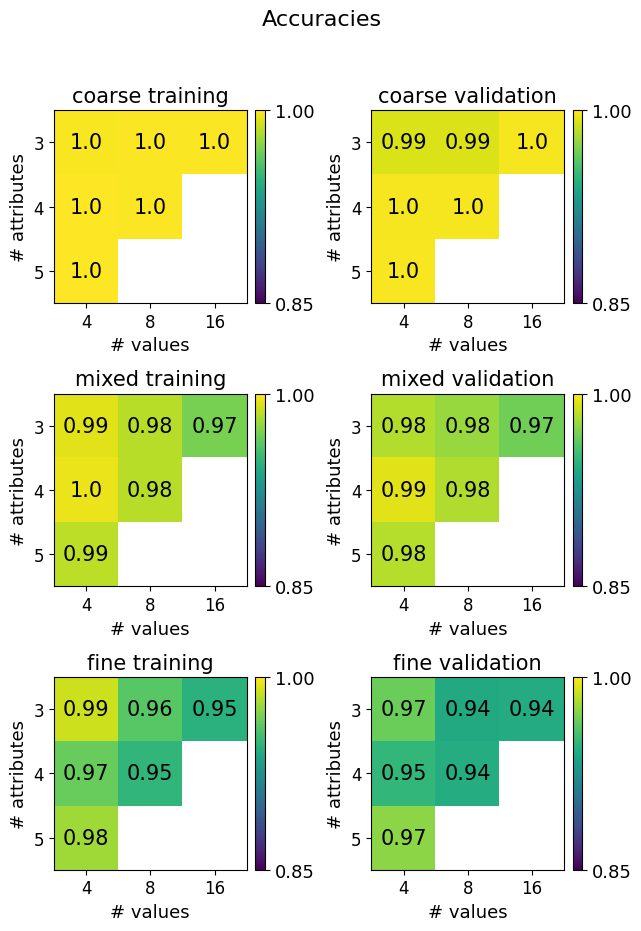

In [7]:
titles = []
conds = ['training', 'validation']


for g in granularity_list:
        for c in conds:
            titles.append(str(g + ' ' + c))

plot_heatmap(accuracies_grans, 'mean', plot_dims=(3,2), ylims=(0.85, 1.0), titles = titles, figsize=(6.5, 9), suptitle='Accuracies', 
             fontsize=15)

In [8]:
for gran in granularity_list:
    print(gran + ' granularity: ')

    final_accuracies_train = {}
    final_accuracies_val = {}

    for i, d in enumerate(datasets):
        gather_train_accuracies = []
        gather_val_accuracies = []
        for run in range(5):
            gather_train_accuracies.append(all_accuracies[gran +'_train_acc'][i][run][-1])
            gather_val_accuracies.append(all_accuracies[gran +'_val_acc'][i][run][-1])

        final_accuracies_train[d] = (round(np.mean(gather_train_accuracies), 3), round(np.std(gather_train_accuracies), 3))
        final_accuracies_val[d] = (round(np.mean(gather_val_accuracies), 3), round(np.std(gather_val_accuracies), 3))

    print('final training accuracy:', final_accuracies_train)
    print('final validation accuracy',final_accuracies_val, '\n')


coarse granularity: 
final training accuracy: {'(3,4)': (0.999, 0.002), '(3,8)': (0.999, 0.001), '(3,16)': (0.999, 0.0), '(4,4)': (1.0, 0.0), '(4,8)': (0.999, 0.0), '(5,4)': (1.0, 0.0)}
final validation accuracy {'(3,4)': (0.992, 0.005), '(3,8)': (0.992, 0.005), '(3,16)': (0.998, 0.0), '(4,4)': (0.998, 0.001), '(4,8)': (0.998, 0.0), '(5,4)': (0.999, 0.0)} 

mixed granularity: 
final training accuracy: {'(3,4)': (0.993, 0.003), '(3,8)': (0.984, 0.006), '(3,16)': (0.969, 0.005), '(4,4)': (0.995, 0.003), '(4,8)': (0.984, 0.004), '(5,4)': (0.985, 0.007)}
final validation accuracy {'(3,4)': (0.983, 0.004), '(3,8)': (0.977, 0.006), '(3,16)': (0.968, 0.006), '(4,4)': (0.993, 0.005), '(4,8)': (0.982, 0.006), '(5,4)': (0.984, 0.008)} 

fine granularity: 
final training accuracy: {'(3,4)': (0.989, 0.004), '(3,8)': (0.961, 0.005), '(3,16)': (0.946, 0.009), '(4,4)': (0.965, 0.016), '(4,8)': (0.949, 0.011), '(5,4)': (0.979, 0.022)}
final validation accuracy {'(3,4)': (0.966, 0.013), '(3,8)': (0.941

#### Accuracies: Boostrapped CIs

In [9]:
num_bootstrap_samples = 1000  # Number of bootstrap samples
confidence_level = 0.95      # Desired confidence level 

bootstrap_means = []

# coarse (train, val), mixed (train, val), fine (train, val)
for i in range(len(accuracies_grans)):
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = [random.choice(accuracies_grans[i]) for _ in range(len(accuracies_grans[i]))]
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)

    # Calculate the lower and upper percentiles of the bootstrap means to construct the confidence interval
    alpha = (1 - confidence_level) / 2
    lower_percentile = np.percentile(bootstrap_means, 100 * alpha)
    upper_percentile = np.percentile(bootstrap_means, 100 * (1 - alpha))
    #for i in bootstrap_means:
    if i % 2 == 0:
        print('train ', end = '')
    elif  i % 2 == 1 :
        print('valid ', end = '')
    if i <= 1:
        print (granularity_list[0] + ': ',  end = '' )
    elif i <= 3 :
        print (granularity_list[1] + ': ', end = '')
    elif i >= 4 :
        print (granularity_list[2] + ': ',  end = '')

    print(f" Bootstrap Confidence Interval ({100*confidence_level}%): ({lower_percentile}, {upper_percentile}), Mean: {np.mean(bootstrap_means)}")

train coarse:  Bootstrap Confidence Interval (95.0%): (0.9937702550118168, 0.997292010207971), Mean: 0.9956223105268214
valid coarse:  Bootstrap Confidence Interval (95.0%): (0.9899875716254115, 0.9970913843048943), Mean: 0.9943543754329384
train mixed:  Bootstrap Confidence Interval (95.0%): (0.9755927220677336, 0.9969264210065206), Mean: 0.9893634127746666
valid mixed:  Bootstrap Confidence Interval (95.0%): (0.9689100404093662, 0.9968443705709444), Mean: 0.9852653081601079
train fine:  Bootstrap Confidence Interval (95.0%): (0.9358564997116725, 0.9967548311750094), Mean: 0.9764890370984056
valid fine:  Bootstrap Confidence Interval (95.0%): (0.9182889465888341, 0.9966608566868637), Mean: 0.9679186303306226


### Test accuracies
means and stds

In [10]:
test_accuracies_grans

[array([[0.95899999, 0.95620006, 0.917     , 0.94440007, 0.9222002 ],
        [0.98202056, 0.97955483, 0.98842454, 0.99633563, 0.96619874],
        [0.99871814, 0.99643946, 0.99907422, 0.99679047, 0.99609363],
        [0.99927998, 0.98976004, 0.97896004, 0.99512005, 0.99032003],
        [0.99924922, 0.99597174, 0.99703509, 0.9969703 , 0.99679106],
        [0.99519193, 0.99875194, 0.9955439 , 0.99571198, 0.99798393]]),
 array([[0.7956779 , 0.73432183, 0.80398303, 0.83171642, 0.75288135],
        [0.63679951, 0.78210992, 0.73057991, 0.66146594, 0.61986005],
        [0.88430744, 0.875736  , 0.86230022, 0.8779186 , 0.87010664],
        [0.86967105, 0.97659606, 0.90132159, 0.98230481, 0.98235208],
        [0.97316808, 0.98245692, 0.96397209, 0.97790849, 0.98108733],
        [0.97328424, 0.97476953, 0.99023068, 0.99163842, 0.96576583]]),
 array([[0.60280001, 0.66160005, 0.73200011, 0.59179991, 0.759     ],
        [0.52434933, 0.64352739, 0.52061653, 0.54647261, 0.57256848],
        [0.67024

In [11]:
for i, d in enumerate(datasets):
    print('\nDataset:', d)
    for g, gran in enumerate(test_accuracies_grans):
        print('Context granularity:', granularity_list[g])
        print('mean:', round(np.mean(gran[i]), 3), ' std:', round(np.std(gran[i]), 3), ' min:', round(np.min(gran[i]), 2), ' max:', round(np.max(gran[i]), 2))


Dataset: (3,4)
Context granularity: coarse
mean: 0.94  std: 0.017  min: 0.92  max: 0.96
Context granularity: mixed
mean: 0.784  std: 0.035  min: 0.73  max: 0.83
Context granularity: fine
mean: 0.669  std: 0.067  min: 0.59  max: 0.76

Dataset: (3,8)
Context granularity: coarse
mean: 0.983  std: 0.01  min: 0.97  max: 1.0
Context granularity: mixed
mean: 0.686  std: 0.061  min: 0.62  max: 0.78
Context granularity: fine
mean: 0.562  std: 0.045  min: 0.52  max: 0.64

Dataset: (3,16)
Context granularity: coarse
mean: 0.997  std: 0.001  min: 1.0  max: 1.0
Context granularity: mixed
mean: 0.874  std: 0.007  min: 0.86  max: 0.88
Context granularity: fine
mean: 0.671  std: 0.037  min: 0.6  max: 0.71

Dataset: (4,4)
Context granularity: coarse
mean: 0.991  std: 0.007  min: 0.98  max: 1.0
Context granularity: mixed
mean: 0.942  std: 0.048  min: 0.87  max: 0.98
Context granularity: fine
mean: 0.761  std: 0.075  min: 0.66  max: 0.89

Dataset: (4,8)
Context granularity: coarse
mean: 0.997  std: 0.00

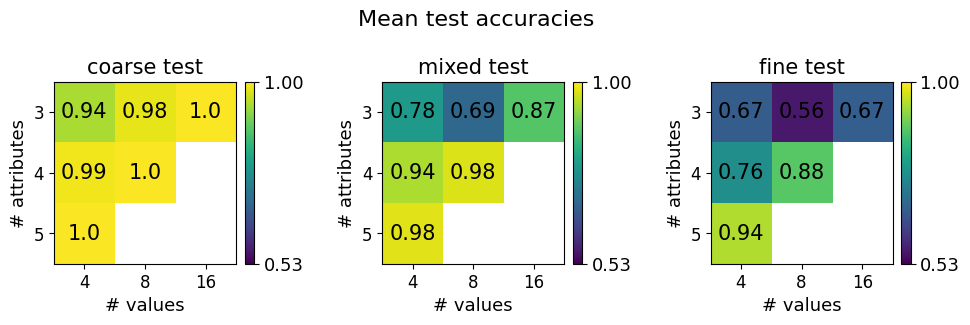

In [30]:
titles = []
conds = ['test']


for g in granularity_list:
        for c in conds:
            titles.append(str(g + ' ' + c))

plot_heatmap(test_accuracies_grans, 'mean', plot_dims=(1,3), ylims=(0.53, 1.0), titles = titles, suptitle='Mean test accuracies', 
             fontsize=15, figsize = (10,3))

## Entropy scores

c:\Users\Colab\Documents\GitHub\emergent-abstractions\utils\load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])
c:\Users\Colab\Documents\GitHub\emergent-abstractions\utils\load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])
c:\Users\Colab\Documents\GitHub\emergent-abstractions\utils\load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

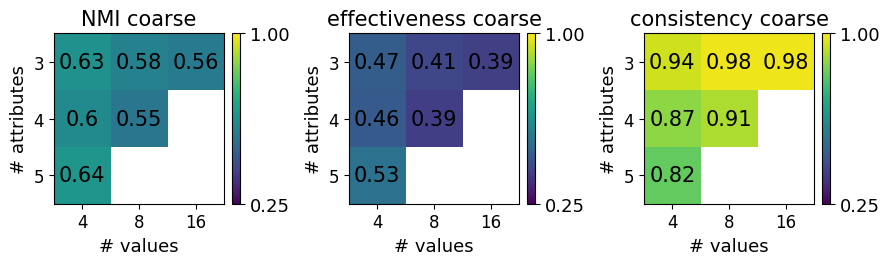

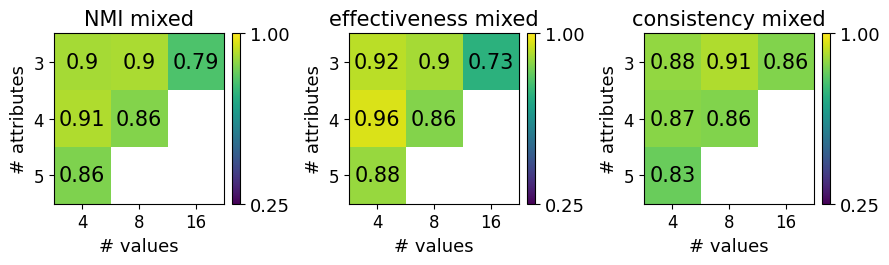

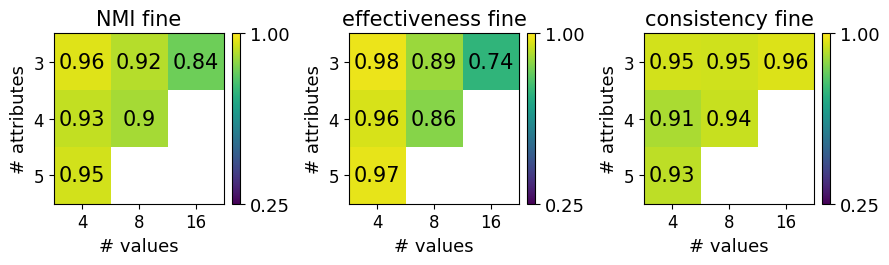

In [36]:
for g in granularity_list:
    entropy_scores = load_entropies(paths, context_unaware=False, granularity = g) # 
#result_dict[key] = np.array(result_dict[key])
    entropies = [entropy_scores['NMI'], entropy_scores['effectiveness'], entropy_scores['consistency']]
    plot_heatmap(entropies, 'mean', plot_dims=(1,3), ylims=(0.25, 1.0), figsize=(9, 3),
             titles = ('NMI '+g, 'effectiveness ' + g, 'consistency ' +g), fontsize = 15)

#### Means and stds

In [13]:
print(list(entropy_scores.keys())[:3])

['NMI', 'effectiveness', 'consistency']


In [14]:
for g in granularity_list:
    entropy_scores= load_entropies(paths, context_unaware=False, granularity = g) 
    entropies = [entropy_scores['NMI'], entropy_scores['effectiveness'], entropy_scores['consistency']]  
    entropy_dict = {}
    for i, score in enumerate(list(entropy_scores.keys())[:3]):
        results = entropies[i]
        mean = np.nanmean(results, axis=-1)
        sd = np.std(results, axis=-1)
        for idx, d in enumerate(datasets):
            entropy_dict[d + score] = (round(mean[idx], 3), round(sd[idx], 3))
    print(g + ' context condition\n', entropy_dict, '\n')

coarse context condition
 {'(3,4)NMI': (0.629, 0.012), '(3,8)NMI': (0.579, 0.015), '(3,16)NMI': (0.561, 0.024), '(4,4)NMI': (0.605, 0.019), '(4,8)NMI': (0.545, 0.012), '(5,4)NMI': (0.641, 0.034), '(3,4)effectiveness': (0.472, 0.015), '(3,8)effectiveness': (0.411, 0.017), '(3,16)effectiveness': (0.393, 0.026), '(4,4)effectiveness': (0.463, 0.023), '(4,8)effectiveness': (0.39, 0.013), '(5,4)effectiveness': (0.528, 0.045), '(3,4)consistency': (0.945, 0.013), '(3,8)consistency': (0.98, 0.009), '(3,16)consistency': (0.982, 0.015), '(4,4)consistency': (0.872, 0.005), '(4,8)consistency': (0.908, 0.008), '(5,4)consistency': (0.819, 0.011)} 

mixed context condition
 {'(3,4)NMI': (0.899, 0.014), '(3,8)NMI': (0.904, 0.029), '(3,16)NMI': (0.79, 0.016), '(4,4)NMI': (0.91, 0.014), '(4,8)NMI': (0.86, 0.015), '(5,4)NMI': (0.856, 0.019), '(3,4)effectiveness': (0.922, 0.019), '(3,8)effectiveness': (0.898, 0.036), '(3,16)effectiveness': (0.732, 0.026), '(4,4)effectiveness': (0.958, 0.017), '(4,8)effecti

c:\Users\Colab\Documents\GitHub\emergent-abstractions\utils\load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])


#### Bootstraped CIs

In [16]:
num_bootstrap_samples = 1000  # Number of bootstrap samples
confidence_level = 0.95      # Desired confidence level 

for g in granularity_list:
    entropy_scores= load_entropies(paths, context_unaware=False, granularity = g) 
    entropies = [entropy_scores['NMI'], entropy_scores['effectiveness'], entropy_scores['consistency']]  
    entropies_bootstrapped = {}
    bootstrap_means = []

    for i in range(len(entropies)):
        score = list(entropy_scores.keys())[i]
        for idx, d in enumerate(datasets):
            for _ in range(num_bootstrap_samples):
                bootstrap_sample = [random.choice(entropies[i][idx]) for _ in range(len(entropies[i][idx]))]
                bootstrap_mean = np.mean(bootstrap_sample)
                bootstrap_means.append(bootstrap_mean)

            # Calculate the lower and upper percentiles of the bootstrap means to construct the confidence interval
            alpha = (1 - confidence_level) / 2
            lower_percentile = np.percentile(bootstrap_means, 100 * alpha)
            upper_percentile = np.percentile(bootstrap_means, 100 * (1 - alpha))
            #print(f"Bootstrap Confidence Interval ({100*confidence_level}%): ({round(lower_percentile,2)}, {round(upper_percentile,2)}), Mean: {round(np.mean(bootstrap_means),2)}")
            entropies_bootstrapped[d + score] = (round(lower_percentile,2), round(upper_percentile,2)), round(np.mean(bootstrap_means),2)
    print('Bootstrapped Entropies', g, 'context condition')
    print(entropies_bootstrapped)

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])


Bootstrapped Entropies coarse context condition
{'(3,4)NMI': ((0.62, 0.64), 0.63), '(3,8)NMI': ((0.57, 0.64), 0.6), '(3,16)NMI': ((0.55, 0.64), 0.59), '(4,4)NMI': ((0.55, 0.64), 0.59), '(4,8)NMI': ((0.54, 0.64), 0.58), '(5,4)NMI': ((0.54, 0.66), 0.59), '(3,4)effectiveness': ((0.47, 0.66), 0.58), '(3,8)effectiveness': ((0.4, 0.65), 0.56), '(3,16)effectiveness': ((0.38, 0.65), 0.54), '(4,4)effectiveness': ((0.39, 0.65), 0.53), '(4,8)effectiveness': ((0.38, 0.65), 0.52), '(5,4)effectiveness': ((0.38, 0.65), 0.52), '(3,4)consistency': ((0.38, 0.95), 0.55), '(3,8)consistency': ((0.38, 0.98), 0.58), '(3,16)consistency': ((0.38, 0.99), 0.61), '(4,4)consistency': ((0.38, 0.99), 0.62), '(4,8)consistency': ((0.38, 0.99), 0.64), '(5,4)consistency': ((0.39, 0.99), 0.65)}
Bootstrapped Entropies mixed context condition
{'(3,4)NMI': ((0.89, 0.91), 0.9), '(3,8)NMI': ((0.88, 0.92), 0.9), '(3,16)NMI': ((0.78, 0.92), 0.86), '(4,4)NMI': ((0.78, 0.92), 0.88), '(4,8)NMI': ((0.78, 0.92), 0.87), '(5,4)NMI': (

In [24]:
num_bootstrap_samples = 1000  # Number of bootstrap samples
confidence_level = 0.95      # Desired confidence level 

for g in granularity_list:
    entropy_scores= load_entropies(paths, context_unaware=False, granularity = g) 
    entropies = [entropy_scores['NMI'], entropy_scores['effectiveness'], entropy_scores['consistency']]  
    entropies_bootstrapped = {}
    bootstrap_means = []

    for i in range(len(entropies)):
        score = list(entropy_scores.keys())[i]
        #for idx, d in enumerate(datasets):
        for _ in range(num_bootstrap_samples):
            bootstrap_sample = [random.choice(entropies[i]) for _ in range(len(entropies[i]))]
            bootstrap_mean = np.mean(bootstrap_sample)
            bootstrap_means.append(bootstrap_mean)

        # Calculate the lower and upper percentiles of the bootstrap means to construct the confidence interval
        alpha = (1 - confidence_level) / 2
        lower_percentile = np.percentile(bootstrap_means, 100 * alpha)
        upper_percentile = np.percentile(bootstrap_means, 100 * (1 - alpha))
        #print(f"Bootstrap Confidence Interval ({100*confidence_level}%): ({round(lower_percentile,2)}, {round(upper_percentile,2)}), Mean: {round(np.mean(bootstrap_means),2)}")
        entropies_bootstrapped[score] = (round(lower_percentile,2), round(upper_percentile,2)), round(np.mean(bootstrap_means),2)
    print('Bootstrapped Entropies', g, 'context condition')
    print(entropies_bootstrapped)

Bootstrapped Entropies coarse context condition
{'NMI': ((0.57, 0.62), 0.59), 'effectiveness': ((0.41, 0.62), 0.52), 'consistency': ((0.41, 0.95), 0.65)}
Bootstrapped Entropies mixed context condition
{'NMI': ((0.83, 0.9), 0.87), 'effectiveness': ((0.82, 0.92), 0.87), 'consistency': ((0.83, 0.91), 0.87)}
Bootstrapped Entropies fine context condition
{'NMI': ((0.88, 0.94), 0.91), 'effectiveness': ((0.84, 0.95), 0.91), 'consistency': ((0.85, 0.95), 0.92)}


/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])


In [77]:
# prepare data for Bayesian estimation
for g in granularity_list:

    entropy_scores= load_entropies(paths, context_unaware=False, granularity = g) 
    df_NMI = pd.DataFrame(entropy_scores['NMI'], columns=range(0,5), index=datasets).reset_index(names='dataset')
    df_NMI = pd.melt(df_NMI, id_vars=['dataset'], value_vars=range(0,5), var_name='run', value_name='NMI')
    df_effectiveness = pd.DataFrame(entropy_scores['effectiveness'], columns=range(0,5), index=datasets).reset_index(names='dataset')
    df_effectiveness = pd.melt(df_effectiveness, id_vars=['dataset'], value_vars=range(0,5), var_name='run', value_name='effectiveness')
    df_consistency = pd.DataFrame(entropy_scores['consistency'], columns=range(0,5), index=datasets).reset_index(names='dataset')
    df_consistency = pd.melt(df_consistency, id_vars=['dataset'], value_vars=range(0,5), var_name='run', value_name='consistency')
    
    data = pd.concat([df_NMI, df_effectiveness, df_consistency], ignore_index=True)
    data = pd.melt(data, id_vars=['dataset', 'run'], value_vars=['NMI', 'effectiveness', 'consistency'], var_name='entropy_score',
                   value_name='value')
    if g == 'fine':
        data['condition'] = 'fine'
        df_fine = data
    elif g == 'mixed':
        data['condition'] = 'mixed'
        df_mixed = data
    else:
        data['condition'] = 'coarse'
        df_coarse = data

df = pd.concat([df_fine, df_mixed, df_coarse], ignore_index=True).dropna()
df.to_csv('BayesianAnalysis/data_for_R.csv', index=False)

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])
/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])
/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-

### Concept-dependent

### Plotting concept level

In [16]:
entropy_dict_hierarchical = {}
for g in granularity_list:
    data_list, run_list, level_list = [], [], []
    NMI_hierarchical, effectiveness_hierarchical, consistency_hierarchical = [], [], []

    for d, data in enumerate(datasets):
        for run in range(5):
            
            if g != 'mixed':
                scores = pickle.load(open(paths[d] + '/' + setting + '/' + 'granularity_'+g + '/' + str(run) + '/entropy_scores.pkl', 'rb'))
            else:
                 scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))

            
            for l, level in enumerate([1, 2, 3, 4, 5]):  
                
                data_list.append(data)
                run_list.append(run)
                level_list.append(level)
                
                try: 
                    NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
                    effectiveness_hierarchical.append(scores['effectiveness_hierarchical'][l])
                    consistency_hierarchical.append(scores['consistency_hierarchical'][l])
                except: 
                    NMI_hierarchical.append(np.nan)
                    effectiveness_hierarchical.append(np.nan)
                    consistency_hierarchical.append(np.nan)
    entropy_dict_hierarchical['data_'+g] = data_list
    entropy_dict_hierarchical['level_'+g] = level_list
    entropy_dict_hierarchical['run_'+g] = run_list
    entropy_dict_hierarchical['NMI_'+g] = NMI_hierarchical
    entropy_dict_hierarchical['Effectiveness_'+g] = effectiveness_hierarchical
    entropy_dict_hierarchical['Consistency_'+g] = consistency_hierarchical

#print(entropy_dict_hierarchical.keys())


In [17]:
all_hierarchical = {}
for g in granularity_list:
    all_hierarchical[g] = {}
    all_hierarchical[g]['metric'] = ['Effectiveness_'+g] * 150 + ['Consistency_'+g] * 150 + ['NMI_'+g] * 150 # change to 25 for one dataset
    all_hierarchical[g]['value'] = (entropy_dict_hierarchical['Effectiveness_'+g] + 
                                entropy_dict_hierarchical['Consistency_'+g] +
                                entropy_dict_hierarchical['NMI_'+g])
    all_hierarchical[g]['level'] = entropy_dict_hierarchical['level_'+g] * 3

print(all_hierarchical.keys())


dict_keys(['coarse', 'mixed', 'fine'])


C:\Users\Colab\AppData\Local\Temp\ipykernel_15768\3407556701.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x='level', y='value', data=all_hierarchical[g], hue='metric', errorbar=('ci', 95),


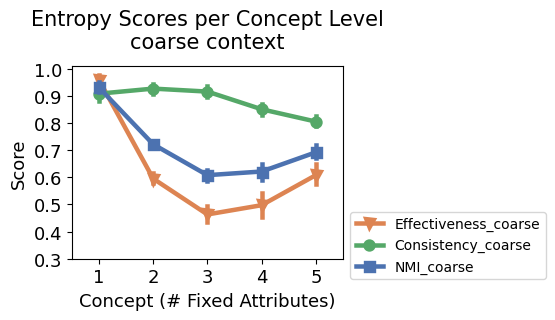

C:\Users\Colab\AppData\Local\Temp\ipykernel_15768\3407556701.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x='level', y='value', data=all_hierarchical[g], hue='metric', errorbar=('ci', 95),


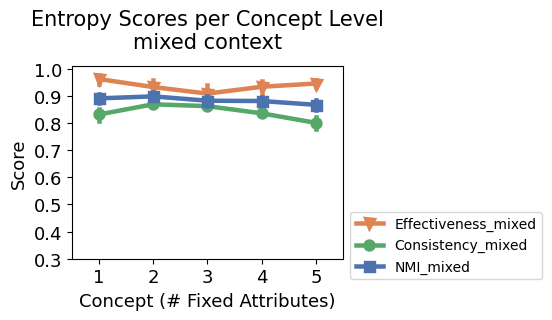

C:\Users\Colab\AppData\Local\Temp\ipykernel_15768\3407556701.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x='level', y='value', data=all_hierarchical[g], hue='metric', errorbar=('ci', 95),


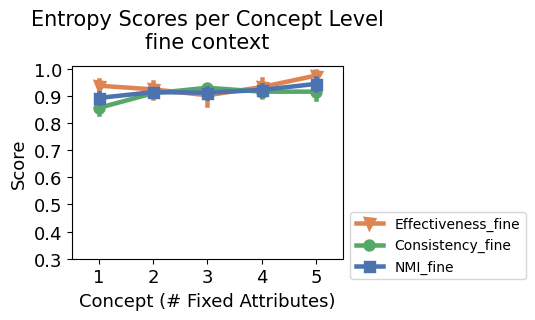

In [18]:
for g in granularity_list:
    plt.figure(figsize=(3.5,2.5))
    ax = sns.pointplot(x='level', y='value', data=all_hierarchical[g], hue='metric', errorbar=('ci', 95),
                    markers=['v', 'o', 's'], palette=sns.color_palette([(0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]), scale=1.2)
    plt.ylabel('Score', fontsize=13)
    plt.title('Entropy Scores per Concept Level\n'+g+' context', fontsize=15, y=1.05)
    plt.ylim([0.3,1.01])
    plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
    plt.yticks(ticks=[0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 1.0], fontsize=13)
    plt.xlabel('Concept (# Fixed Attributes)', fontsize=13)
    plt.xticks(fontsize=13)
    #plt.legend(fontsize=10, loc='lower left')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.28))
    plt.show()


### Symbol redundancy

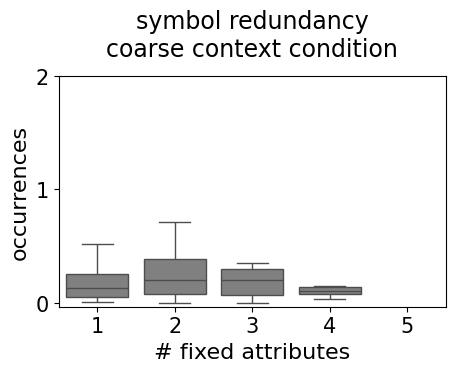

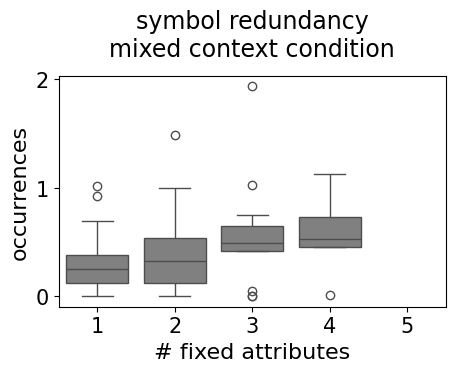

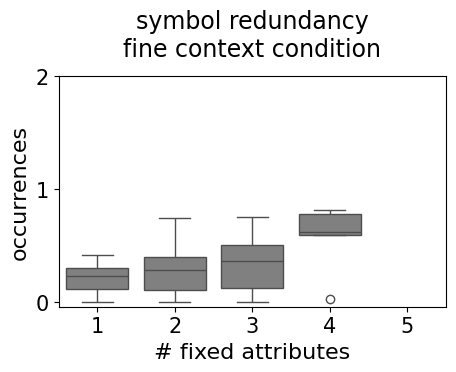

In [19]:

for g in granularity_list:
    symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}
    for d, dataset in enumerate(datasets): 
        for run in range(5):
            if g == 'mixed':
                scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
            else:
                 scores = pickle.load(open(paths[d]  + '/' + setting + '/' + 'granularity_' + g + '/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
                
            for level in range(5):
                
                symbol_redundancy_dict['level'].append(level)
                symbol_redundancy_dict['run'].append(run)
                symbol_redundancy_dict['data set'].append(dataset)
                try: 
                    symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
                except: 
                    symbol_redundancy_dict['symbol frequency'].append(np.NaN)
    
    plt.figure(figsize=(5,3))
    sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
    plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5], fontsize=15)
    plt.yticks(ticks=[0, 1, 2], fontsize=15)
    plt.xlabel('# fixed attributes', fontsize=16)
    plt.ylabel('occurrences', fontsize=16)
    plt.title('symbol redundancy' + '\n' + g + ' context condition', fontsize=17, y=1.05)
    plt.show()